In [ ]:
# To do:
# create markdown sections (including fMRIPrep website, nilearn website etc.) and put references
# improve comments
# should I only get values 11-192 instead of all values?
# Different pipelines have different n of participants - remove extra participants:
    # exclude M006, M107, M108
# Save dvars median and upper/lower bound values when going through the loop
# do a Wilcoxon Signed Rank Test to check whether the differences between pipelines are significant

In [22]:
#pip install statannot

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pipeline_list = []
for n in range(12):
        # get a pipeline
        pipeline = pd.read_excel(r'~/Downloads/PhD/Analysis/QC/ARB_QC.xlsx', sheet_name=n)
        stacked_pipeline = pipeline.stack()
        pipeline_list.append(stacked_pipeline)

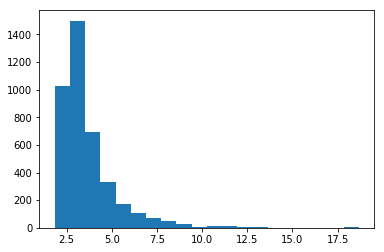

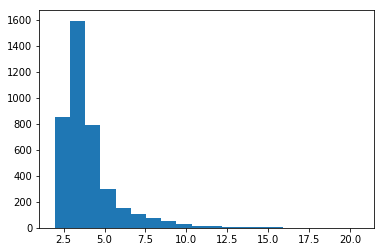

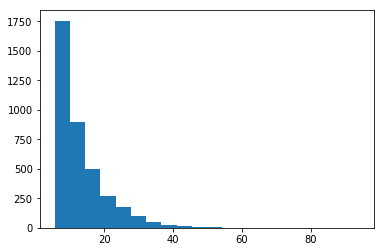

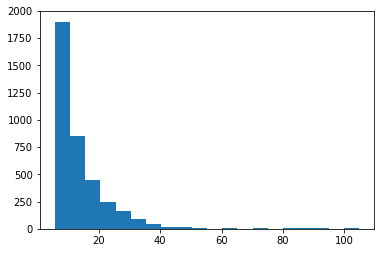

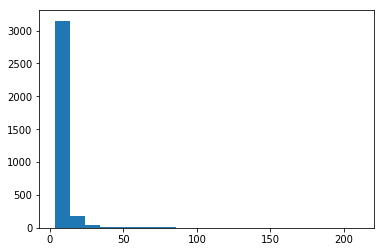

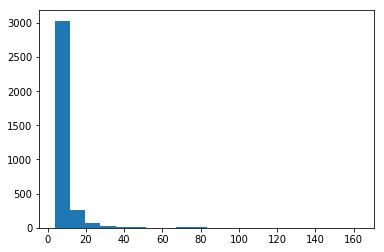

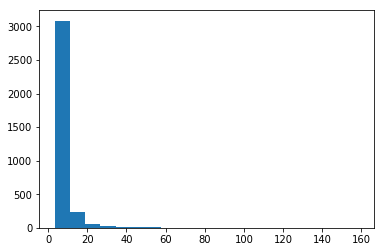

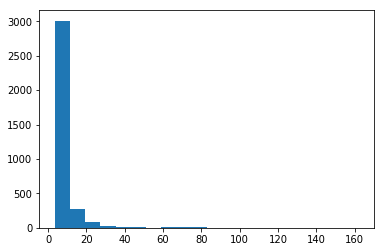

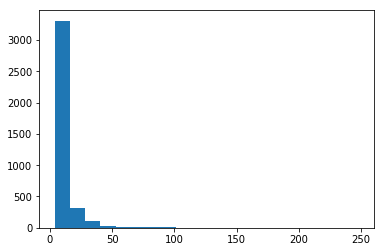

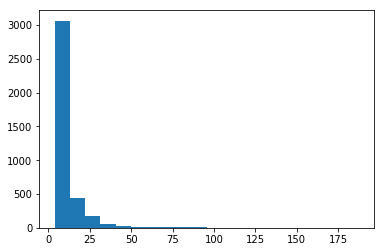

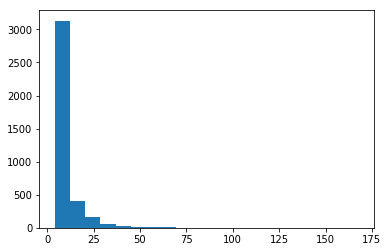

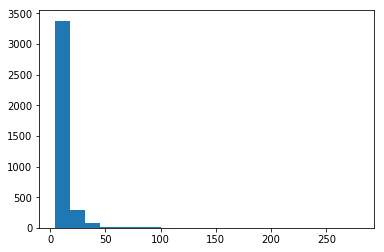

In [3]:
# check normality
for n in range(12):
    plt.hist(pipeline_list[n], bins = 20)
    plt.show()

In [3]:
import xlrd
xls = xlrd.open_workbook(r'~/Downloads/PhD/Analysis/QC/ARB_QC.xlsx', on_demand=True)
pipeline_names = xls.sheet_names()
pipeline_names

['MEICA_3_echo',
 'MEICA_4_echo',
 '1_echo',
 '1_echo_SDC',
 '3_echo',
 '3_echo_SDC',
 '3_echo_T2s',
 '3_echo_T2s_SDC',
 '4_echo',
 '4_echo_SDC',
 '4_echo_T2s',
 '4_echo_T2s_SDC']

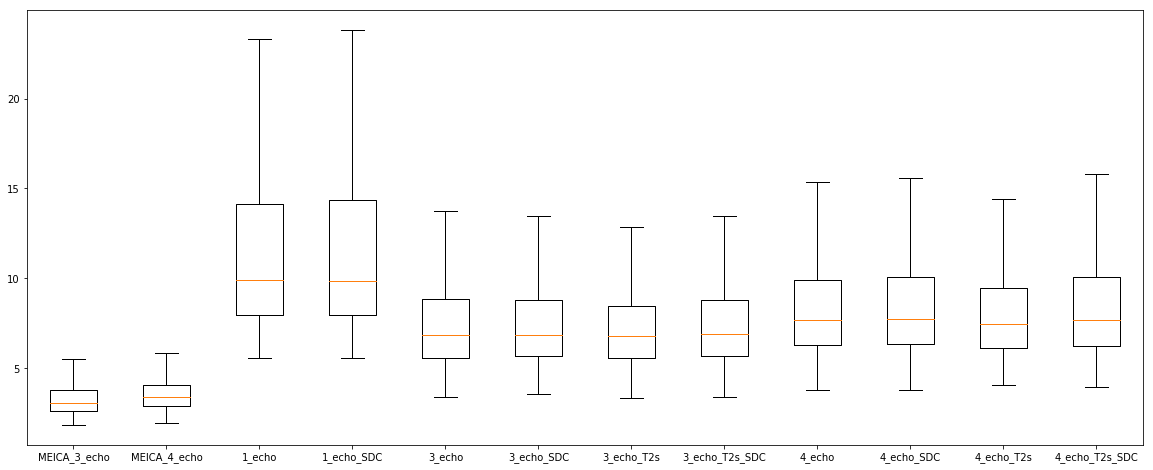

In [4]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

fig, ax = plt.subplots(figsize=(20,8))
dvars_figure = ax.boxplot(pipeline_list, 
                          #notch=True, 
                          bootstrap=5000, 
                          showfliers=False)
ax.set_xticklabels(pipeline_names)
#plt.show(dvars_figure)
plt.savefig("dvars.png")

In [10]:
# get the median value
# the integer should match the pipeline of interest, i.e. ranges from 0 to 11 in this case
#print(dvars_figure['medians'][0].get_ydata())
# for the lower and upper bounds, each pipeline gets a couple of indices, i.e. 
# pipeline 1 has 0 for lower and 1 for upper boundary, pipeline 2 has 2 for lower and 3 for upper boundary etc.
# get the lower bound of the whiskers
#print(dvars_figure['caps'][0].get_ydata())
# get the upper bound of the whiskers
#print(dvars_figure['caps'][1].get_ydata())

In [5]:
# convert the list of Pandas Series objects into a Pandas DataFrame object
df_pipeline_list = pd.concat(pipeline_list, axis=1)
df_pipeline_list
# there are 3438 instead of 3456 rows because by default pd.stack() gets rid of 0's

0        1         2        3         4         5         6  \
0   0     3.27061  3.26922   8.18908  18.8007  13.47820  13.50270   6.00060   
    0.1   2.49046  3.03093  16.61550  23.5093  15.49000  15.08640   7.03698   
    0.2   2.86700  3.06855   8.22911  18.3823  18.26410  14.66840   5.59414   
    0.3   3.61683  3.82601  21.77850  59.0945  39.43180  20.57370   7.03026   
    0.4   3.20922  3.34560   7.13750  28.3236  22.87900  22.83500   5.25222   
...           ...      ...       ...      ...       ...       ...       ...   
190 0.13  6.74825  8.52097  30.42650  23.9909  37.70760  39.05880  36.09080   
    0.14  4.06137  4.67625  16.40420  14.9614   8.81448   8.16199   8.85175   
    0.15  4.51715  4.05079  11.31030  10.8822   8.96405   8.91679   8.69740   
    0.16  2.60696  2.90582  12.27250  12.8591   6.04500   6.25096   5.71284   
    0.17  6.46680  4.78742  14.16430  13.3600   9.57494   9.99594  12.14570   

                 7         8         9        10        11  
0   0     13.45690  15.21930  18.77520   7.00165  14.90970  
    0.1   20.37080  16.47880  16.17540   7.60036  15.99170  
    0.2   16.87830  20.17850  14.32950   6.85083  21.28800  
    0.3   24.74810  23.14750  22.90680   8.91669  23.32580  
    0.4   22.97470  25.36830  25.21820   6.15223  29.73170  
...            ...       ...       ...       ...       ...  
190 0.13  38.46600  42.46290  42.57440  40.55970  44.96210  
    0.14   8.70807   8.59944   9.76999  10.28110   8.85594  
    0.15   8.90285  10.48090   9.88066   9.61186  10.70270  
    0.16   6.38231   6.56449   7.04411   6.35265   6.57341  
    0.17  12.77400  13.78880  14.16370  13.03640  13.29500  

[3438 rows x 12 columns]

In [6]:
# Rename columns so that they are labelled by the pipeline names
df_pipeline_list.columns = pipeline_names

In [7]:
# visualise the updated dataframe
df_pipeline_list

MEICA_3_echo  MEICA_4_echo    1_echo  1_echo_SDC    3_echo  \
0   0          3.27061       3.26922   8.18908     18.8007  13.47820   
    0.1        2.49046       3.03093  16.61550     23.5093  15.49000   
    0.2        2.86700       3.06855   8.22911     18.3823  18.26410   
    0.3        3.61683       3.82601  21.77850     59.0945  39.43180   
    0.4        3.20922       3.34560   7.13750     28.3236  22.87900   
...                ...           ...       ...         ...       ...   
190 0.13       6.74825       8.52097  30.42650     23.9909  37.70760   
    0.14       4.06137       4.67625  16.40420     14.9614   8.81448   
    0.15       4.51715       4.05079  11.31030     10.8822   8.96405   
    0.16       2.60696       2.90582  12.27250     12.8591   6.04500   
    0.17       6.46680       4.78742  14.16430     13.3600   9.57494   

          3_echo_SDC  3_echo_T2s  3_echo_T2s_SDC    4_echo  4_echo_SDC  \
0   0       13.50270     6.00060        13.45690  15.21930    18.77520   
    0.1     15.08640     7.03698        20.37080  16.47880    16.17540   
    0.2     14.66840     5.59414        16.87830  20.17850    14.32950   
    0.3     20.57370     7.03026        24.74810  23.14750    22.90680   
    0.4     22.83500     5.25222        22.97470  25.36830    25.21820   
...              ...         ...             ...       ...         ...   
190 0.13    39.05880    36.09080        38.46600  42.46290    42.57440   
    0.14     8.16199     8.85175         8.70807   8.59944     9.76999   
    0.15     8.91679     8.69740         8.90285  10.48090     9.88066   
    0.16     6.25096     5.71284         6.38231   6.56449     7.04411   
    0.17     9.99594    12.14570        12.77400  13.78880    14.16370   

          4_echo_T2s  4_echo_T2s_SDC  
0   0        7.00165        14.90970  
    0.1      7.60036        15.99170  
    0.2      6.85083        21.28800  
    0.3      8.91669        23.32580  
    0.4      6.15223        29.73170  
...              ...             ...  
190 0.13    40.55970        44.96210  
    0.14    10.28110         8.85594  
    0.15     9.61186        10.70270  
    0.16     6.35265         6.57341  
    0.17    13.03640        13.29500  

[3438 rows x 12 columns]

In [11]:
# create a list that contains all possible pairs of pipelines WITHOUT repetitions!!
import itertools
combo_list = list(itertools.combinations(pipeline_names, 2))
print(combo_list)
# to see how many comparisons would be made
print(len(combo_list))

[('MEICA_3_echo', 'MEICA_4_echo'), ('MEICA_3_echo', '1_echo'), ('MEICA_3_echo', '1_echo_SDC'), ('MEICA_3_echo', '3_echo'), ('MEICA_3_echo', '3_echo_SDC'), ('MEICA_3_echo', '3_echo_T2s'), ('MEICA_3_echo', '3_echo_T2s_SDC'), ('MEICA_3_echo', '4_echo'), ('MEICA_3_echo', '4_echo_SDC'), ('MEICA_3_echo', '4_echo_T2s'), ('MEICA_3_echo', '4_echo_T2s_SDC'), ('MEICA_4_echo', '1_echo'), ('MEICA_4_echo', '1_echo_SDC'), ('MEICA_4_echo', '3_echo'), ('MEICA_4_echo', '3_echo_SDC'), ('MEICA_4_echo', '3_echo_T2s'), ('MEICA_4_echo', '3_echo_T2s_SDC'), ('MEICA_4_echo', '4_echo'), ('MEICA_4_echo', '4_echo_SDC'), ('MEICA_4_echo', '4_echo_T2s'), ('MEICA_4_echo', '4_echo_T2s_SDC'), ('1_echo', '1_echo_SDC'), ('1_echo', '3_echo'), ('1_echo', '3_echo_SDC'), ('1_echo', '3_echo_T2s'), ('1_echo', '3_echo_T2s_SDC'), ('1_echo', '4_echo'), ('1_echo', '4_echo_SDC'), ('1_echo', '4_echo_T2s'), ('1_echo', '4_echo_T2s_SDC'), ('1_echo_SDC', '3_echo'), ('1_echo_SDC', '3_echo_SDC'), ('1_echo_SDC', '3_echo_T2s'), ('1_echo_SDC'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
MEICA_3_echo v.s. MEICA_4_echo: Wilcoxon test (paired samples) with Bonferroni correction, P_val=5.542e-270 stat=9.056e+05
Using zero_method  wilcox
MEICA_4_echo v.s. 1_echo: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=2.000e+00
Using zero_method  wilcox
1_echo v.s. 1_echo_SDC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=2.908e+06
Using zero_method  wilcox
1_echo_SDC v.s. 3_echo: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=2.451e+05
Using zero_method  wilcox
3_echo v.s. 3_echo_SDC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.082e-01 stat=2.773e+06
Using zero_method  wilcox
3_echo_SDC v.s. 3_echo_T2s: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.480e

Using zero_method  wilcox
MEICA_4_echo v.s. 4_echo_SDC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=4.000e+00
Using zero_method  wilcox
1_echo v.s. 4_echo_T2s: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=3.567e+05
Using zero_method  wilcox
1_echo_SDC v.s. 4_echo_T2s_SDC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=5.997e+05
Using zero_method  wilcox
MEICA_3_echo v.s. 4_echo_SDC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=0.000e+00
Using zero_method  wilcox
MEICA_4_echo v.s. 4_echo_T2s: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=9.000e+00
Using zero_method  wilcox
1_echo v.s. 4_echo_T2s_SDC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=7.380e+05
Using zero_method  wilcox
MEICA_3_echo v.s. 4_echo_T2s: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00

(<matplotlib.axes._subplots.AxesSubplot at 0x121d2f990>,
  <statannot.StatResult.StatResult at 0x121f70c50>])

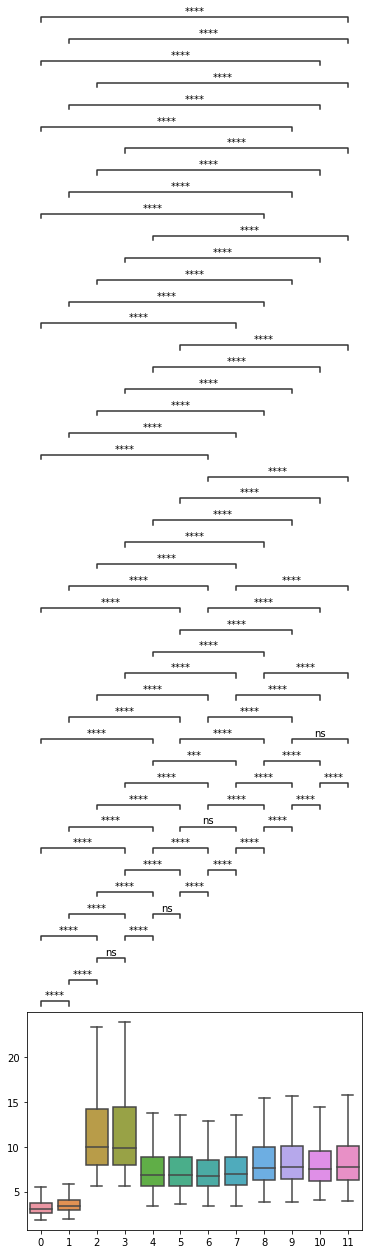

In [13]:
import seaborn as sns
import statannot
from statannot import add_stat_annotation

# create the boxplot using seaborn instead of matplotlib
sb_ax = sns.boxplot(data=pipeline_list, showfliers=False)

# plot it after a Wilcoxon test for significance 
test_results = add_stat_annotation(sb_ax, data=df_pipeline_list,
                                   box_pairs=[combo_list[n] for n in range(len(combo_list))],
                                   test='Wilcoxon', text_format='star',
                                   loc='outside', verbose=2)
test_results